# Dinamic stochastic models in Python

## Forecasting non-observables

1. Load libraries

In [2]:
import sys
sys.path.append('Libraries')
import DSGE_LinearMethods as DLM
import DSGE_PreProcessing as DPP
import HandleTimeSeries as HTS
import sympy as sp
sp.init_session(use_latex=True)

IPython console for SymPy 1.12 (Python 3.12.4-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



* Check Libraries below are actually needed

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. Procesing and solving the model

In [4]:
Mod = DPP.process_file3('MPTBolsillo.txt')
Mod = DLM.SolveModel(Mod, "Cal_MPTBolsillo.txt", True)

Problem with steady state (or initial point):
Check equations:
[13 14 15 30 31 44]
* Stability conditions NOT met: Empty outcome!


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 42

In [ ]:
Mod = DLM.SolveModel(Mod, "Cal_MPTBolsillo.txt", True)

Problem with steady state (or initial point):
Check equations:
[13 14 15 44]
* Stability conditions NOT met: Empty outcome!


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 42

3. Load data

In [ ]:
Describ, DBobs = HTS.ReadDB_excel('DataTarea.xlsx',sheet='VarObs')
DBobs

,Dpsae,D4psae,Dpae,Dp,D4p,Meta,Dpm,ED4p,i,imn,...,ED4s,DTI,DY,EDy,g,t,Dps,Dpms,iext,DYs
2010-03-31,0.938349,1.478646,-9.068546,-2.886654,-1.018423,2.5,-2.568317,1.973611,2.716667,2.600000,...,2.206048,14.247948,-1.949311,0.277284,0.878653,-1.881677,2.465017,-4.401295,1.905434,3.4949
2010-06-30,0.948082,1.078012,6.974091,3.129094,0.077549,2.5,-3.246502,2.043056,2.450000,2.533333,...,2.517381,8.058552,9.253783,0.277284,-0.921629,-0.007617,1.244821,11.206700,1.918172,2.3957
2010-09-30,2.376302,1.230553,-0.917911,1.146859,0.286165,2.5,10.884752,2.035694,2.658333,3.746789,...,2.653328,0.603676,2.260378,0.277284,1.496454,1.858429,0.332932,5.436430,1.809630,1.7408
2010-12-31,0.760291,1.253672,11.164924,4.504825,1.434856,2.5,5.238113,2.095833,3.833333,4.113330,...,1.949309,9.016097,4.803253,1.104530,-1.268637,0.356832,3.632756,0.276668,1.549003,0.5714
2011-03-31,2.522663,1.648670,2.416276,2.482845,2.808798,2.5,-0.487067,2.306944,3.625000,3.790000,...,2.481978,-10.633712,4.734175,1.580333,0.606145,1.284875,5.823621,21.834017,1.332079,2.1883
2011-06-30,6.210784,2.948337,-6.062904,1.486297,2.396905,2.5,6.451110,2.542708,3.625000,3.786667,...,2.585911,-6.751578,6.135399,0.046771,-0.800166,0.338398,0.307520,-0.476178,1.236440,3.4364
2011-09-30,1.702565,2.778542,-4.370240,-0.558525,1.962534,2.5,0.107849,2.176181,3.000000,3.083333,...,2.103648,21.779881,0.572962,0.378954,-1.501886,-1.014657,-0.107388,2.367107,1.129029,6.9185
2011-12-31,0.309442,2.663379,11.239309,4.183451,1.884054,2.5,2.279405,2.020694,2.583333,2.603333,...,1.416412,24.949655,-0.746755,0.152993,-0.087544,0.687598,4.966040,7.165948,1.167005,4.6230
2012-03-31,0.679702,2.198863,17.721412,6.742915,2.926734,2.5,7.989428,2.476250,2.500000,2.470000,...,0.878554,34.046105,11.963825,0.435899,-2.079971,-0.113355,4.473511,24.547744,1.121834,2.1028
2012-06-30,0.035989,0.679947,9.184436,3.428611,3.415709,2.5,10.150251,2.653333,2.500000,2.486667,...,0.988413,6.958763,5.065337,0.155378,-1.256449,0.269838,3.626987,1.077006,1.301406,3.0340


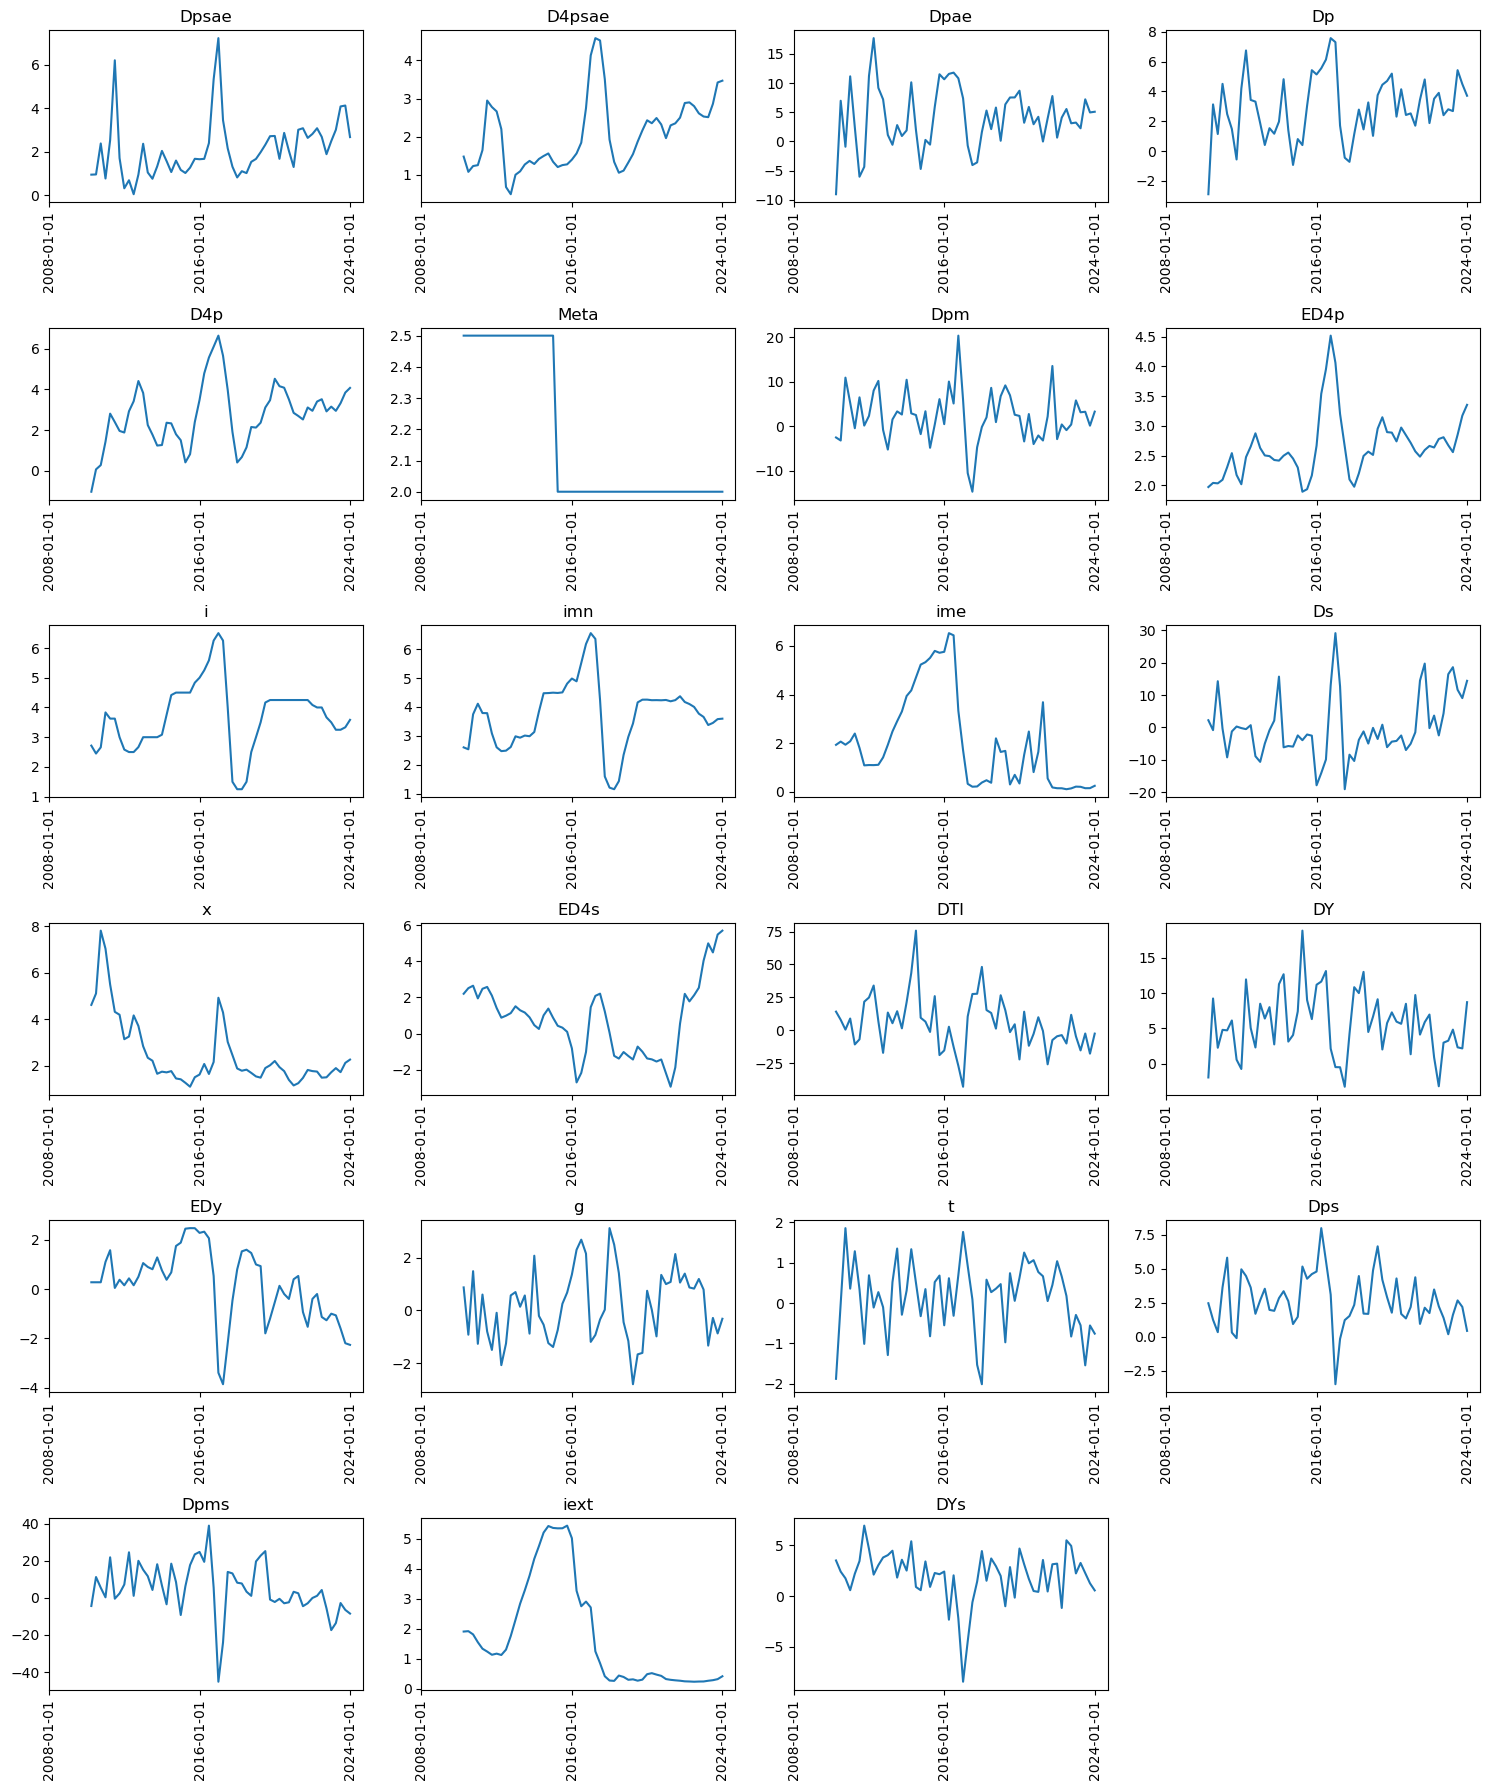

In [ ]:
import math

columns = DBobs.columns
num_cols = len(columns)
num_rows = math.ceil(num_cols / 4)

fig, axs = plt.subplots(num_rows, 4, figsize=(15, num_rows * 3))


for idx, col in enumerate(columns):
    row = idx // 4
    col_idx = idx % 4
    axs[row, col_idx].plot(DBobs.index, DBobs[col], linestyle='-')
    axs[row, col_idx].set_title(col)
    axs[row, col_idx].tick_params(axis='x', rotation = 90)
    axs[row, col_idx].set_xticks(axs[row, col_idx].get_xticks()[::4])

for idx in range(num_cols, num_rows * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

<Axes: >

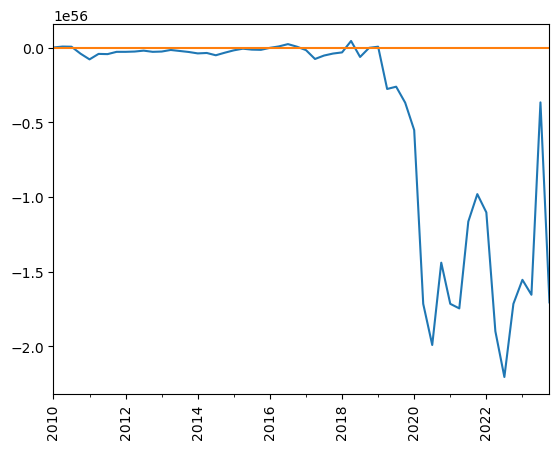

In [ ]:
DF_s.Dpsae.plot.line(rot = 90)
DBobs.Dpsae.plot.line(rot = 90)

<Axes: >

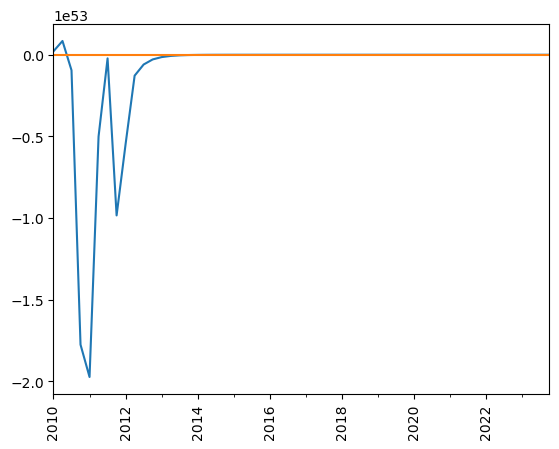

In [ ]:
DF_s.Meta.plot.line(rot = 90)
DBobs.Meta.plot.line(rot = 90)

In [ ]:
DF_s, DF_u, minuslogL = DLM.KFts(DBobs, Mod, {'diffuse':False})

e:\anaconda3\Lib\site-packages\numpy\linalg\linalg.py:2180: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


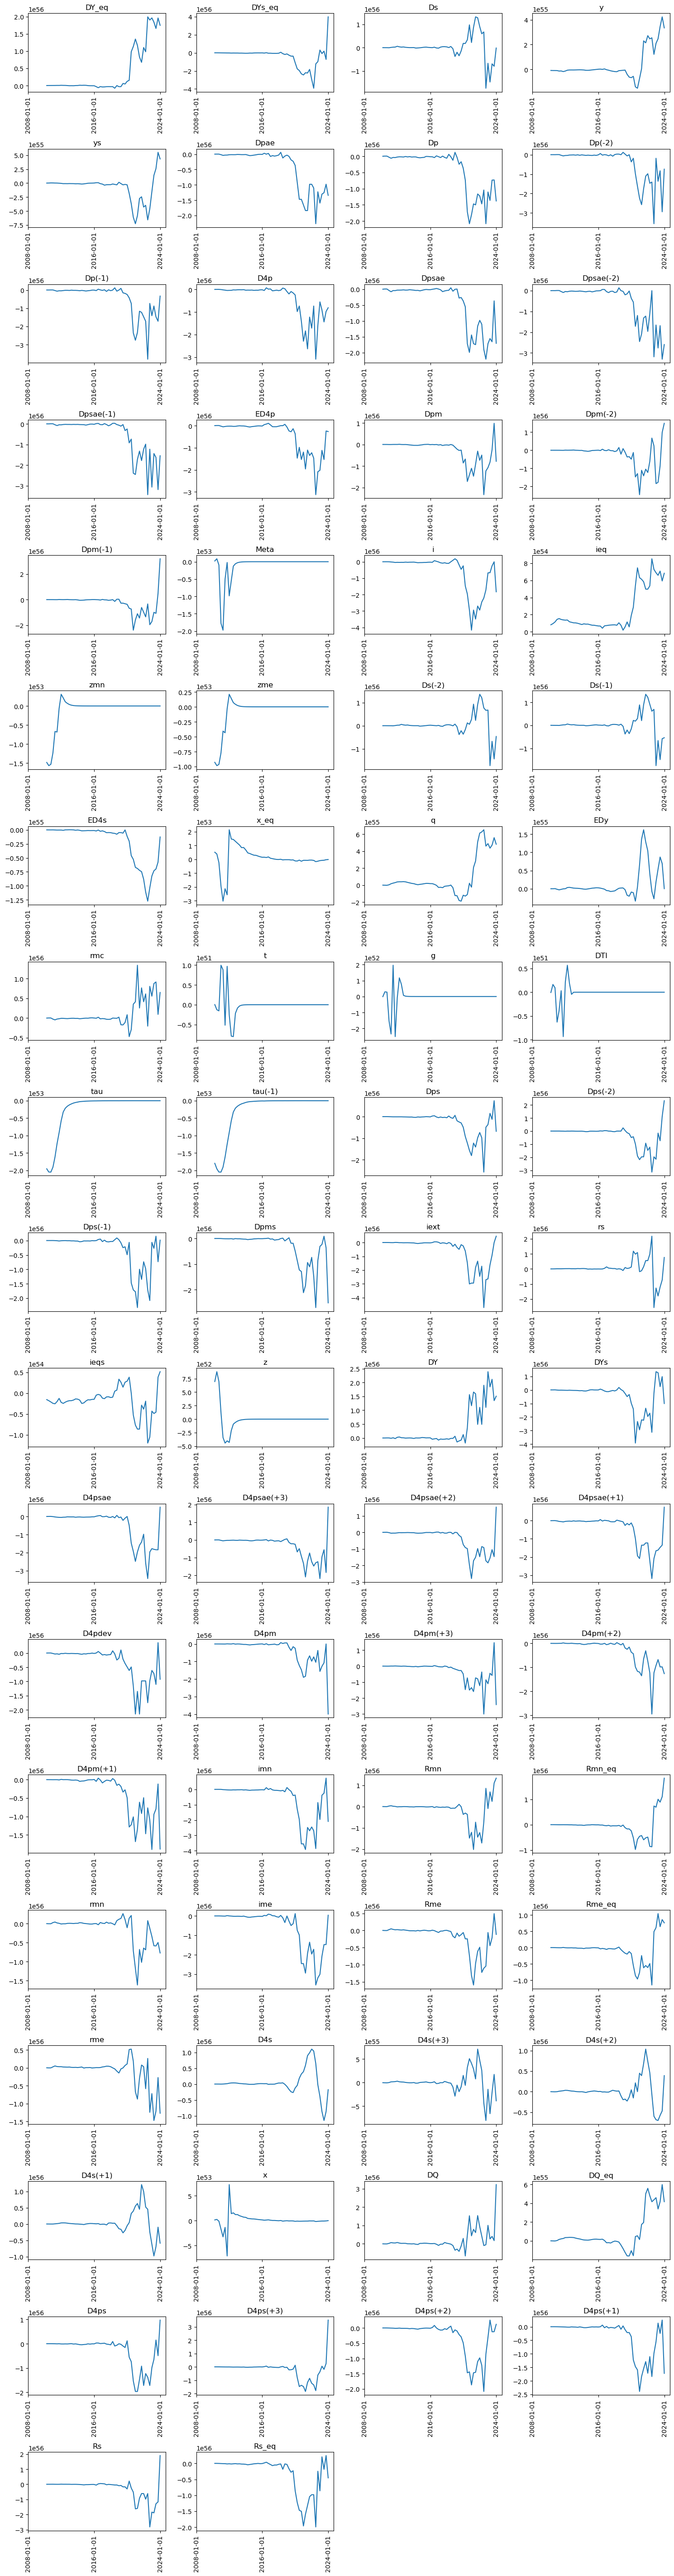

In [ ]:
columns = DF_s.columns
num_cols = len(columns)
num_rows = math.ceil(num_cols / 4)

fig, axs = plt.subplots(num_rows, 4, figsize=(15, num_rows * 3))


for idx, col in enumerate(columns):
    row = idx // 4
    col_idx = idx % 4
    axs[row, col_idx].plot(DF_s.index, DF_s[col], linestyle='-')
    axs[row, col_idx].set_title(col)
    axs[row, col_idx].tick_params(axis='x', rotation = 90)
    axs[row, col_idx].set_xticks(axs[row, col_idx].get_xticks()[::4])

for idx in range(num_cols, num_rows * 4):
    fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

In [ ]:
Data = DF_s
Data

,DY_eq,DYs_eq,Ds,y,ys,Dpae,Dp,Dp(-2),Dp(-1),D4p,...,D4s(+1),x,DQ,DQ_eq,D4ps,D4ps(+3),D4ps(+2),D4ps(+1),Rs,Rs_eq
2010-03-31,1.150706e+53,2.139805e+53,4.158592e+52,-8.181642e+53,9.948243e+52,2.414817e+53,2.433133e+53,1.789381e+53,2.860865e+53,2.310356e+53,...,5.710640e+52,1.442022e+52,-5.237245e+51,-8.983888e+51,2.309338e+53,1.726301e+53,1.877182e+53,2.068742e+53,1.640114e+53,1.930215e+53
2010-06-30,2.024018e+53,1.158567e+53,-6.083848e+52,-8.756740e+53,1.771222e+53,3.300644e+53,6.261043e+53,2.860865e+53,2.433133e+53,3.336105e+53,...,-2.164936e+52,2.454348e+52,-4.617336e+53,-9.246240e+52,2.203036e+53,1.552436e+53,1.746105e+53,1.975590e+53,2.175662e+53,1.546361e+53
2010-09-30,2.559148e+53,-1.556441e+53,-6.884257e+52,-8.885930e+53,3.775117e+53,3.053018e+53,5.597201e+53,2.409490e+53,6.135968e+53,4.280212e+53,...,-1.137399e+53,-1.075665e+52,-3.780729e+53,-1.474129e+53,2.229901e+53,8.081519e+52,1.376851e+53,1.840791e+53,3.651650e+53,-1.795893e+52
2010-12-31,2.865946e+53,-6.884257e+53,-3.883619e+53,-9.233884e+53,3.284988e+53,-1.525013e+54,-2.873429e+54,6.165900e+53,5.582235e+53,-3.561855e+53,...,-8.792394e+52,-1.702357e+53,2.461870e+54,3.337368e+53,1.608821e+53,-2.050311e+53,-6.809428e+52,6.360455e+52,4.856395e+53,-3.891102e+53
2011-03-31,3.255056e+53,-1.014680e+54,9.679116e+53,-1.292903e+54,1.702357e+53,-3.750424e+54,-6.043929e+54,5.844136e+53,-2.856218e+54,-1.858749e+54,...,5.374585e+53,-3.237518e+53,6.582112e+54,1.478993e+54,2.469353e+52,-4.467284e+53,-3.225125e+53,-1.571407e+53,1.283315e+53,-6.584942e+53
2011-06-30,4.669322e+53,-1.305016e+54,2.077250e+54,-1.217466e+54,1.062570e+53,-2.945265e+54,-3.567841e+54,-2.981183e+54,-6.195832e+54,-3.041046e+54,...,1.101481e+54,-1.350661e+53,4.915889e+54,2.085481e+54,-2.873429e+53,-6.525079e+53,-5.387680e+53,-4.190417e+53,-5.387680e+52,-7.602615e+53
2011-09-30,4.310144e+53,-1.724057e+54,2.490305e+54,-1.730044e+54,-1.436715e+53,-2.777648e+54,-3.927020e+54,-6.129982e+54,-4.022801e+54,-4.405925e+54,...,1.951537e+54,-7.063847e+53,4.537624e+54,2.502278e+54,9.578097e+52,-7.662478e+53,-1.053591e+54,-6.704668e+53,4.789049e+52,-1.532496e+54
2011-12-31,8.141383e+53,-1.819838e+54,5.848626e+54,-1.282567e+54,-4.190417e+53,-1.724057e+54,-2.298743e+54,-3.974910e+54,-4.214363e+54,-4.070691e+54,...,3.328389e+54,7.213504e+53,7.220987e+54,3.460088e+54,-7.662478e+53,-6.704668e+53,-9.578097e+53,-9.099192e+53,8.620287e+53,-1.053591e+54
2012-03-31,5.746858e+53,-3.064991e+54,3.543896e+54,-6.046174e+53,-9.099192e+53,-1.436715e+54,-1.532496e+54,-3.639677e+54,-2.873429e+54,-3.831239e+54,...,3.460088e+54,1.406783e+53,4.127561e+54,3.525937e+54,-8.620287e+53,-1.149372e+54,-3.831239e+53,-1.436715e+54,3.352334e+53,-1.724057e+54
2012-06-30,4.789049e+53,-2.298743e+54,2.226908e+54,-4.370007e+53,-8.620287e+53,-1.532496e+54,-1.724057e+54,-1.724057e+54,-1.340934e+54,-1.915619e+54,...,3.328389e+54,1.556441e+53,2.352620e+54,3.687567e+54,-5.746858e+53,-1.628277e+54,-1.053591e+54,-1.532496e+54,3.831239e+53,-1.149372e+54


# Forecast

1. Unconditional

In [ ]:
import pandas as pd

In [ ]:
FH = 8
FDB = DLM.DSGEforecast0(Mod,Data,FH,'2024Q1')

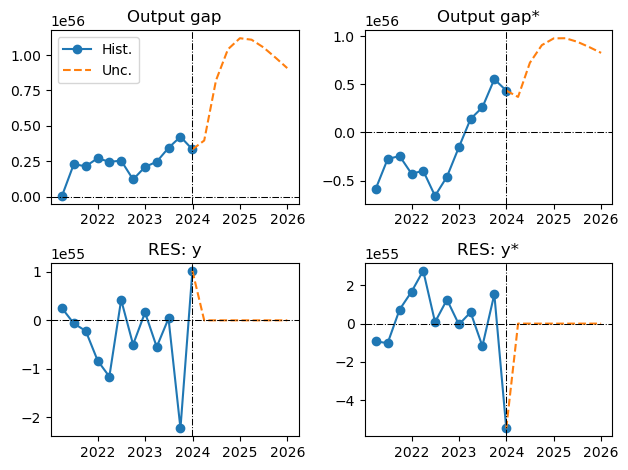

In [ ]:
DBdict = {'Unc.': FDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(DBdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

KeyError: 'res_Dp'

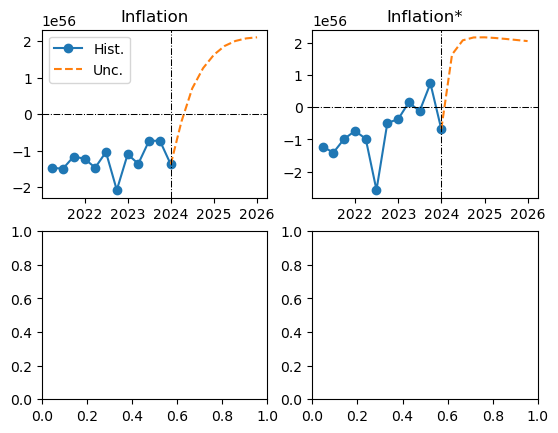

In [ ]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(DBdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

2. Not anticipated conditional forecast

In [ ]:
FH = 8
UCond = HTS.ReadForeCond('Supuestos_OnlyU.xlsx','2025Q1', FH)

In [ ]:
print('Which are the assumptions?')
print('Unanticipated Softtunning')
print(UCond['UShock'])
print('Unanticipated Hardtunning')
print(UCond['Uvar']['var'])
print('-> Shocks to achieve hardtunning:')
print(UCond['Uvar']['shock'])

Which are the assumptions?
Unanticipated Softtunning
            res_Dps  res_ys
2025-03-31     -0.1     NaN
2025-06-30      NaN     NaN
2025-09-30      0.1    -1.2
2025-12-31      NaN    -0.6
2026-03-31      NaN     NaN
2026-06-30      NaN     NaN
2026-09-30      NaN     NaN
2026-12-31      NaN     NaN
Unanticipated Hardtunning
             Dp     y
2025-03-31  NaN   NaN
2025-06-30  NaN   NaN
2025-09-30  NaN   NaN
2025-12-31  NaN   NaN
2026-03-31  2.1   NaN
2026-06-30  2.0  1.50
2026-09-30  NaN  0.75
2026-12-31  NaN   NaN
-> Shocks to achieve hardtunning:
['res_Dp', 'res_y']


In [ ]:
UFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',UCond)

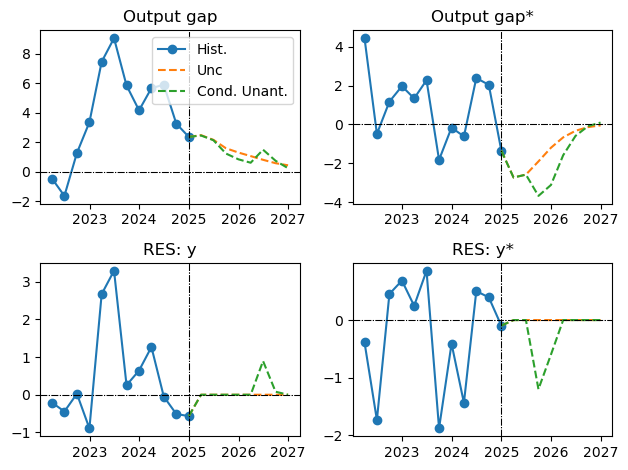

In [ ]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

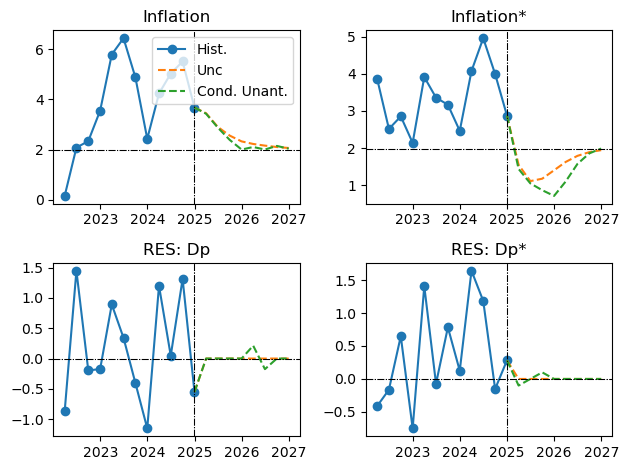

In [ ]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

In [ ]:
UFDB['Dp_uh'] = UCond['Uvar']['var']['Dp']
UFDB[['Dp','Dp_uh']].tail(10)

,Dp,Dp_uh
2024-09-30,5.517448,NaN
2024-12-31,3.677557,NaN
2025-03-31,3.429162,NaN
2025-06-30,2.873091,NaN
2025-09-30,2.384590,NaN
2025-12-31,1.998593,NaN
2026-03-31,2.100000,2.1
2026-06-30,2.000000,2.0
2026-09-30,2.144046,NaN
2026-12-31,2.032999,NaN


3. Anticipated shocks

In [ ]:
ACond = HTS.ReadForeCond('Supuestos_OnlyA.xlsx','2025Q1', FH)

In [ ]:
print('Which are the assumptions?')
print('Unanticipated Softtunning')
print(ACond['AShock'])
print('Unanticipated Hardtunning')
print(ACond['Avar']['var'])
print('-> Shocks to achieve hardtunning:')
print(ACond['Avar']['shock'])

Which are the assumptions?
Unanticipated Softtunning
            res_Dps  res_ys
2025-03-31     -0.1     NaN
2025-06-30      NaN     NaN
2025-09-30      0.1    -1.2
2025-12-31      NaN    -0.6
2026-03-31      NaN     NaN
2026-06-30      NaN     NaN
2026-09-30      NaN     NaN
2026-12-31      NaN     NaN
Unanticipated Hardtunning
             Dp     y
2025-03-31  NaN   NaN
2025-06-30  NaN   NaN
2025-09-30  NaN   NaN
2025-12-31  NaN   NaN
2026-03-31  2.1   NaN
2026-06-30  2.0  1.50
2026-09-30  NaN  0.75
2026-12-31  NaN   NaN
-> Shocks to achieve hardtunning:
['res_Dp', 'res_y']


In [ ]:
AFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',ACond)

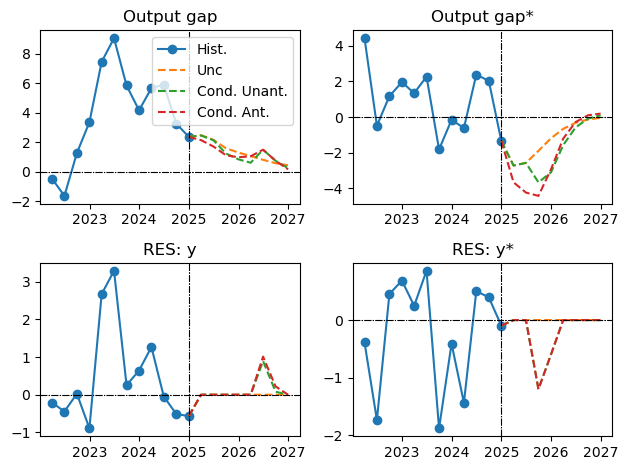

In [ ]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB,'Cond. Ant.': AFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

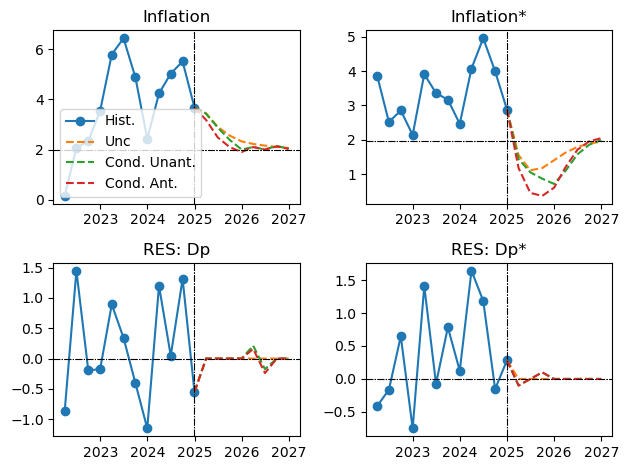

In [ ]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

In [ ]:
AFDB['Dp_uh'] = ACond['Avar']['var']['Dp']
AFDB[['Dp','Dp_uh']].tail(10)

,Dp,Dp_uh
2024-09-30,5.517448,NaN
2024-12-31,3.677557,NaN
2025-03-31,3.179213,NaN
2025-06-30,2.478276,NaN
2025-09-30,2.095114,NaN
2025-12-31,1.898100,NaN
2026-03-31,2.100000,2.1
2026-06-30,2.000000,2.0
2026-09-30,2.125014,NaN
2026-12-31,2.024667,NaN


4. Anticipated and ununticipated shocks

In [ ]:
Cond = HTS.ReadForeCond('Supuestos_MixedUA.xlsx','2025Q1', FH)
print('Which are the assumptions?')
print('Unanticipated Softtunning')
print(Cond['UShock'])
print('Anticipated Softtunning')
print(Cond['AShock'])
print('Unanticipated Hardtunning')
print(Cond['Uvar']['var'])
print('-> Shocks to achieve hardtunning:')
print(Cond['Uvar']['shock'])
print('Anticipated Hardtunning')
print(Cond['Avar']['var'])
print('-> Shocks to achieve hardtunning:')
print(Cond['Avar']['shock'])

Which are the assumptions?
Unanticipated Softtunning
            res_ys
2025-03-31     NaN
2025-06-30     NaN
2025-09-30    -1.2
2025-12-31    -0.6
2026-03-31     NaN
2026-06-30     NaN
2026-09-30     NaN
2026-12-31     NaN
Anticipated Softtunning
            res_Dps
2025-03-31     -0.1
2025-06-30      NaN
2025-09-30      0.1
2025-12-31      NaN
2026-03-31      NaN
2026-06-30      NaN
2026-09-30      NaN
2026-12-31      NaN
Unanticipated Hardtunning
             Dp
2025-03-31  NaN
2025-06-30  NaN
2025-09-30  NaN
2025-12-31  NaN
2026-03-31  2.1
2026-06-30  2.0
2026-09-30  NaN
2026-12-31  NaN
-> Shocks to achieve hardtunning:
['res_Dp']
Anticipated Hardtunning
               y
2025-03-31   NaN
2025-06-30   NaN
2025-09-30   NaN
2025-12-31   NaN
2026-03-31   NaN
2026-06-30  1.50
2026-09-30  0.75
2026-12-31   NaN
-> Shocks to achieve hardtunning:
['res_y']


In [ ]:
AUFDB = DLM.DSGEforecast0(Mod,Data,FH,'2025Q1',Cond)

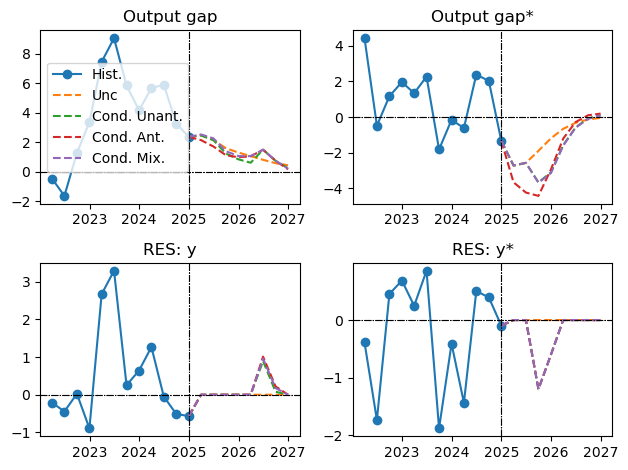

In [ ]:
BDdict = {'Unc': FDB,'Cond. Unant.': UFDB,'Cond. Ant.': AFDB,'Cond. Mix.': AUFDB}
lista = ['y','ys','res_y','res_ys']
listanames = ['Output gap','Output gap*','RES: y','RES: y*']
listaSS = [0,0,0,0]
HH = 12
Number_Rows = 2
Number_Cols = 2
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)

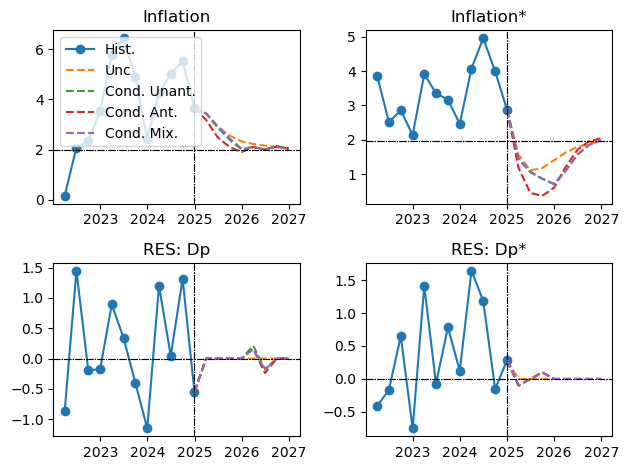

In [ ]:
lista = ['Dp','Dps','res_Dp','res_Dps']
listanames = ['Inflation','Inflation*','RES: Dp','RES: Dp*']
listaSS = [100*np.log(1+2.0/100),100*np.log(1+2.0/100),0,0]
fig, axs = HTS.plotTSforecast(BDdict,lista,listanames,listaSS,FH,HH,Number_Rows,Number_Cols)